In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [3]:
# read data into memory
data_set = np.genfromtxt("hw03_data_set.csv", delimiter = ",")

# get x and y values
x_train = data_set[1:151, 0]
y_train = data_set[1:151:, 1].astype(int)

x_test=data_set[151:, 0]
y_test = data_set[151:, 1].astype(int)

# get number of classes and number of samples
K = np.max(y_train) #96
N_tr = x_train.shape[0] # 150
N_test = x_test.shape[0] # 222

In [4]:
bin_width = 0.37
left_borders = np.arange(start = 1.5,
                         stop = np.max(x_train),
                         step = bin_width)
right_borders = np.arange(start = 1.5 + bin_width,
                          stop = np.max(x_train) + bin_width,
                          step = bin_width)
data_interval = np.linspace(1.5, np.max(x_train), 1601)

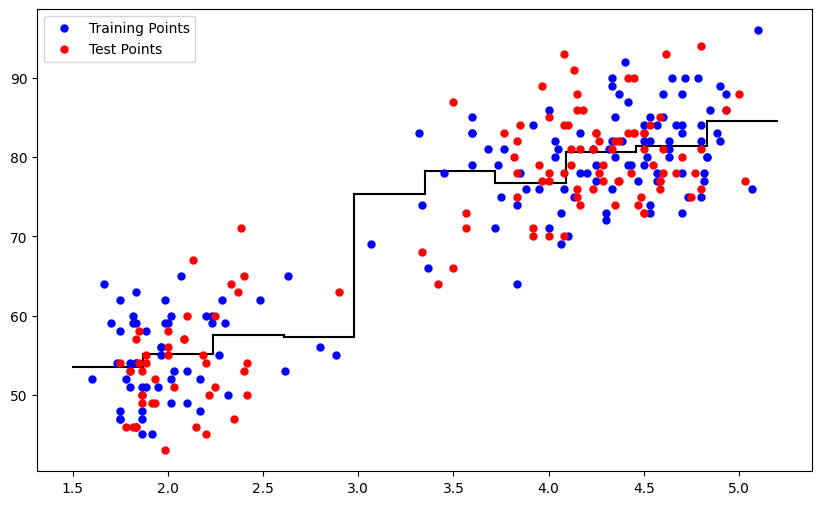

In [5]:

x=x_test
                  
p_hat = np.asarray([np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b]))
                    for b in range(len(left_borders))])

p_hat1=np.asarray([np.sum(y_train[(left_borders[b] < x_train) & (x_train <= right_borders[b])])
                    for b in range(len(left_borders))])
p_hat= p_hat1/p_hat

plt.figure(figsize = (10, 6))

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-") 
    
plt.plot(x_train,y_train,
         "b.", markersize = 10,label='Training Points')
plt.plot(x_test,y_test,
         "r.", markersize = 10,label='Test Points')

plt.legend()
plt.show()

In [6]:
#RMSE
y_predicted0= np.zeros((len(y_test),1))
for i in range (len(x_test)):
    for b in range(len(left_borders)):
            if((left_borders[b] < x_test[i]) &(x_test[i] <= right_borders[b])):
                  y_predicted0[i]=p_hat[b]
err=mean_squared_error(y_test, y_predicted0, squared=False)

print(f"Regressogram => RMSE is {err} when h is {bin_width}")

Regressogram => RMSE is 5.962617204275405 when h is 0.37


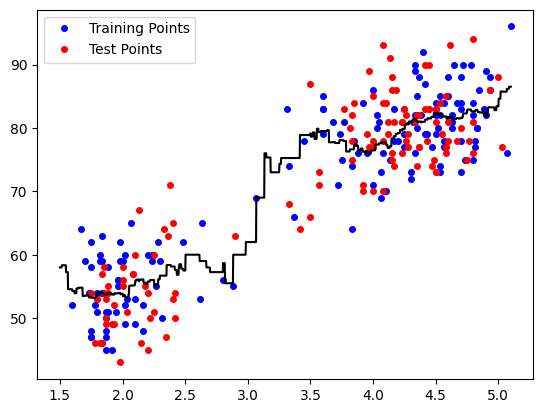

In [7]:
bin_width = 0.37
p_hat = np.asarray([np.sum(y_train[
    ((x - 0.5 * bin_width) < x_train) &
                            (x_train <= (x + 0.5 * bin_width))
])
                    for x in data_interval])
p_hat1=np.asarray([np.sum(((x - 0.5 * bin_width) < x_train) &
                            (x_train <= (x + 0.5 * bin_width)))
                    for x in data_interval]) 
p_hat= p_hat/p_hat1
plt.plot(x_train,y_train,
         "b.", markersize = 8,label='Training Points')
plt.plot(x_test,y_test,
         "r.", markersize = 8,label='Test Points')

plt.plot(data_interval, p_hat, "k-")
plt.legend()
plt.show()

In [8]:
y_predicted1= np.zeros((len(y_test),1))
for i in range (len(x_test)):
    for b in range(len(data_interval)-1):
            if(data_interval[b+1]> x_test[i] and data_interval[b]<= x_test[i]):
                  y_predicted1[i]=p_hat[b]
      

err=mean_squared_error(y_test, y_predicted1, squared=False)
print(f"Running Mean Smoother => RMSE is {err:.3f} when h is {bin_width}")

Running Mean Smoother => RMSE is 6.090 when h is 0.37


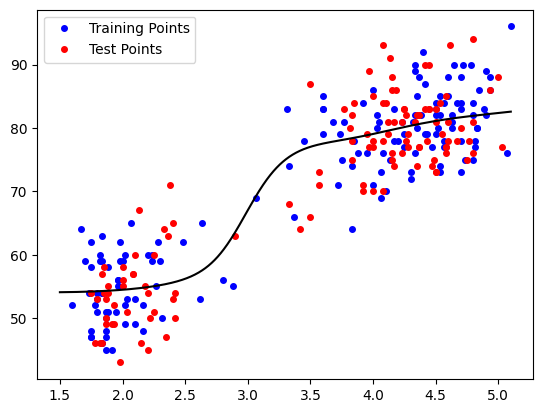

In [9]:
bin_width = 0.37
p_hat = np.asarray([np.sum(  (1.0 / np.sqrt(2 * math.pi) * \
                           np.exp(-0.5 * (x - x_train)**2 / bin_width**2))*y_train )
                    for x in data_interval])

p_hat1 = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * \
                           np.exp(-0.5 * (x - x_train)**2 / bin_width**2))
                    for x in data_interval]) 
p_hat= p_hat/p_hat1
plt.plot(x_train,y_train,
         "b.", markersize = 8,label='Training Points')
plt.plot(x_test,y_test,
         "r.", markersize = 8,label='Test Points')

plt.plot(data_interval, p_hat, "k-")
plt.legend()
plt.show()

In [10]:
y_predicted2= np.zeros((len(y_test),1))
for i in range (len(x_test)):
    for b in range(len(data_interval)-1):
            if(data_interval[b+1]> x_test[i] and data_interval[b]<= x_test[i]):
                  y_predicted2[i]=p_hat[b]
           

err=mean_squared_error(y_test, y_predicted2, squared=False)
print(f"Kernel Smoother => RMSE is {err:.3f} when h is {bin_width}")

Kernel Smoother => RMSE is 5.874 when h is 0.37
